In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('DS3_C1_S2_Weather_Data_Practice.csv')

In [11]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [12]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [14]:
df.set_index('Date')

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [15]:
temp=df['Temp']

In [ ]:
dfma=pd.DataFrame({'actual':temp,'ma':temp.rolling(window=4).mean()})

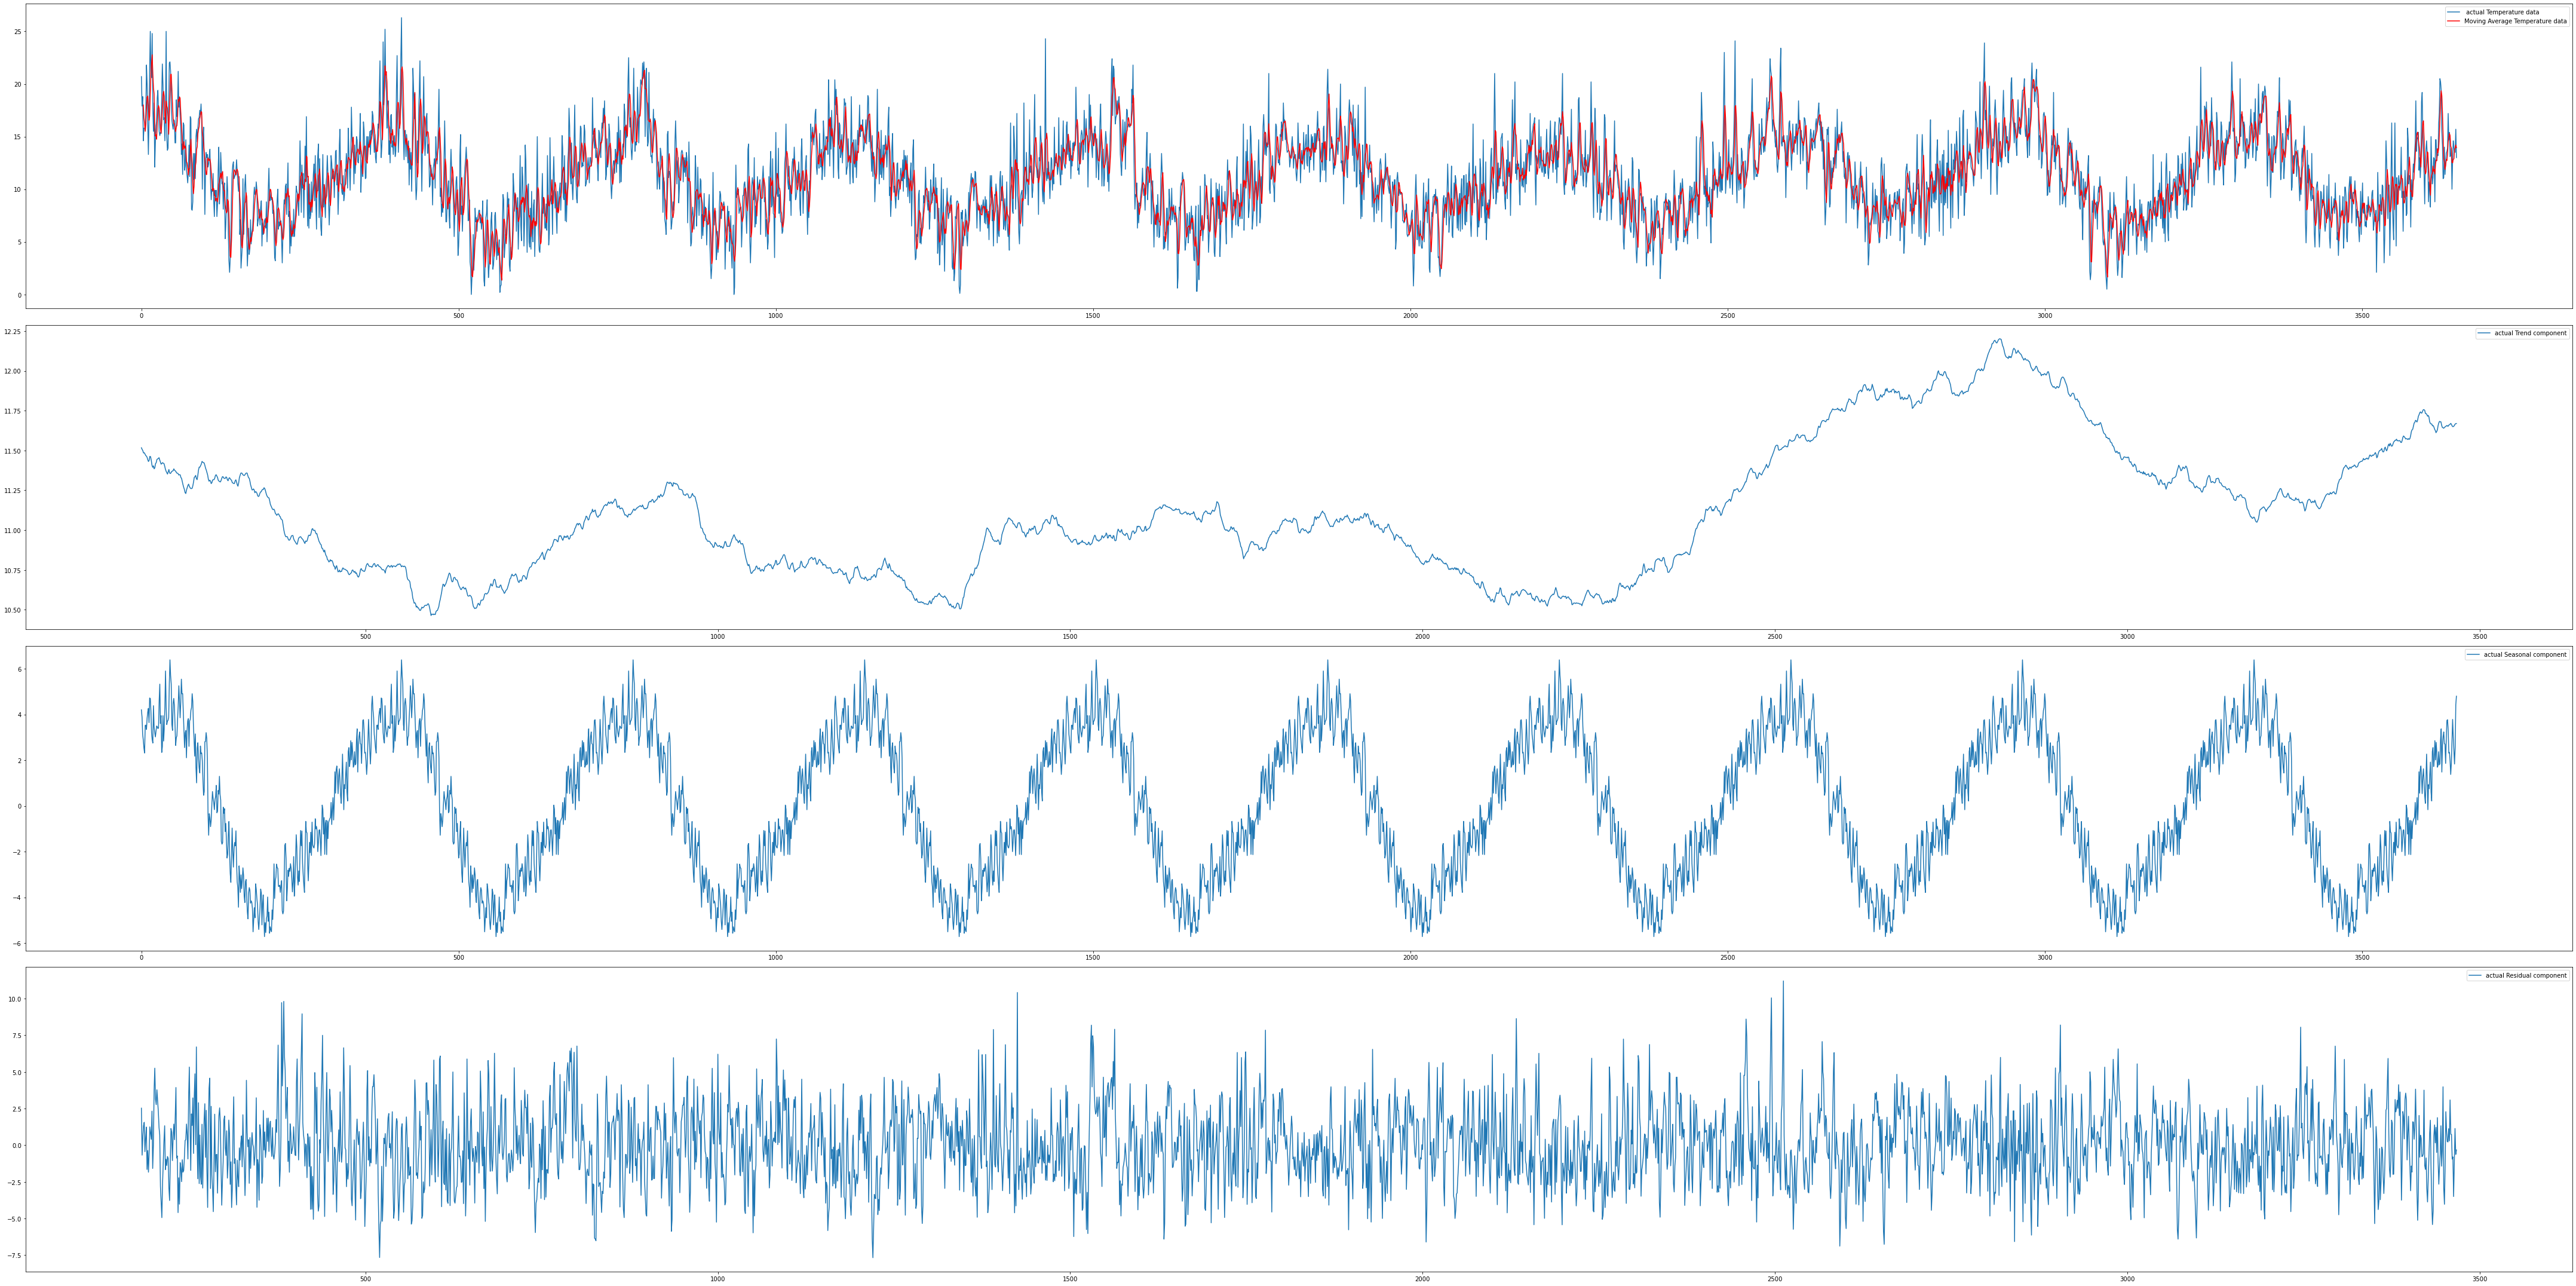

In [29]:
decomposition=seasonal_decompose(np.asarray(temp), period=365)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid
plt.figure(figsize=(60,30))

plt.subplot(411)
plt.plot(temp,label=' actual Temperature data')
plt.plot(dfma.ma, color='red', label = 'Moving Average Temperature data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='actual Trend component')
plt.plot(dfma.ma, color='red', label = 'Moving Average Temperature data')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='actual Seasonal component')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='actual Residual component')
plt.legend(loc='best')

plt.tight_layout()

In [17]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

In [28]:
dfma

,actual,ma
0,20.7,NaN
1,17.9,NaN
2,18.8,NaN
3,14.6,18.000
4,15.8,16.775
...,...,...
3645,14.0,12.875
3646,13.6,13.775
3647,13.5,13.925
3648,15.7,14.200


In [35]:
def checkStationarity(data):
    pvalue = adfuller(temp)[1]
    print(pvalue)

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [36]:
print(checkStationarity(temp))

0.0002470826300361191
pvalue=0.0002470826300361191. Data is Stationary. Proceed to model building


In [41]:
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [45]:
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model, df2 = simplesmoothing(tem
                                 p,a)
    d_simple_exp[a] = df2.forecast

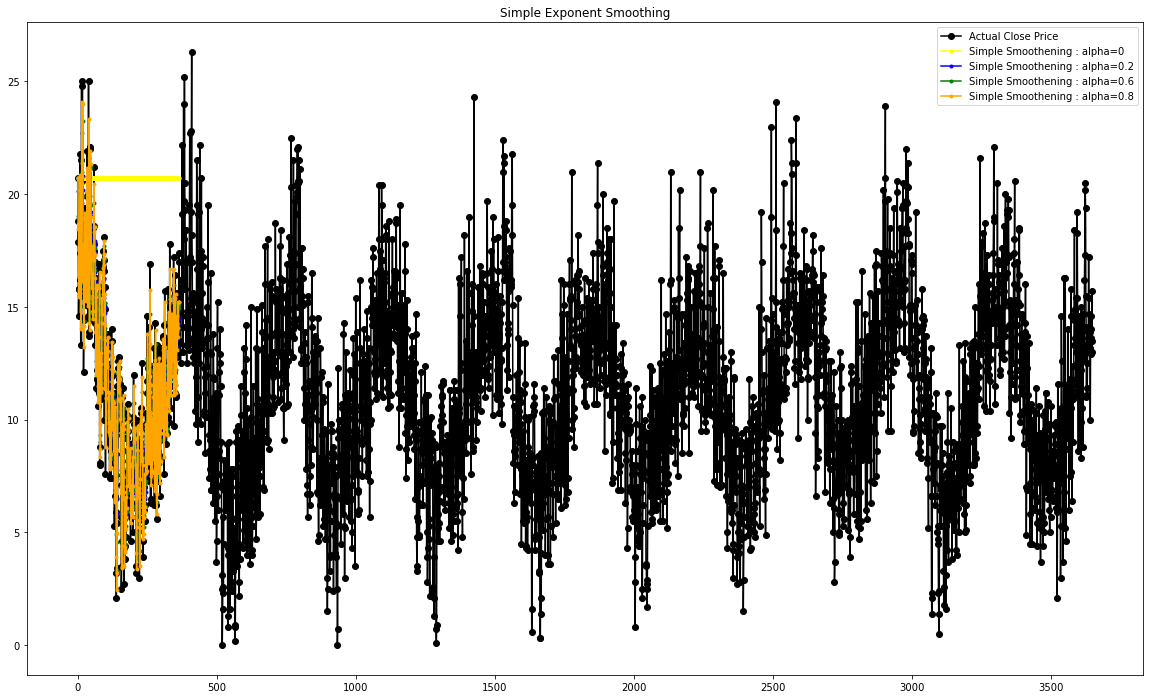

In [47]:
colors = ['yellow','blue','green','orange']


# plot the actual and forecast data
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(temp, marker='o', color='black',label='Actual Close Price')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

In [48]:
modela = ExponentialSmoothing(temp,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

# forecast with double exponent smoothing
f_dexp = modela.fittedvalues
print(f_dexp)

0       16.180352
1       17.000558
2       17.186667
3       17.676888
4       16.921376
          ...    
3645    13.729330
3646    13.645129
3647    13.493255
3648    13.352431
3649    13.914528
Length: 3650, dtype: float64


Text(0.5, 1.0, 'Double Exponent Smoothing')

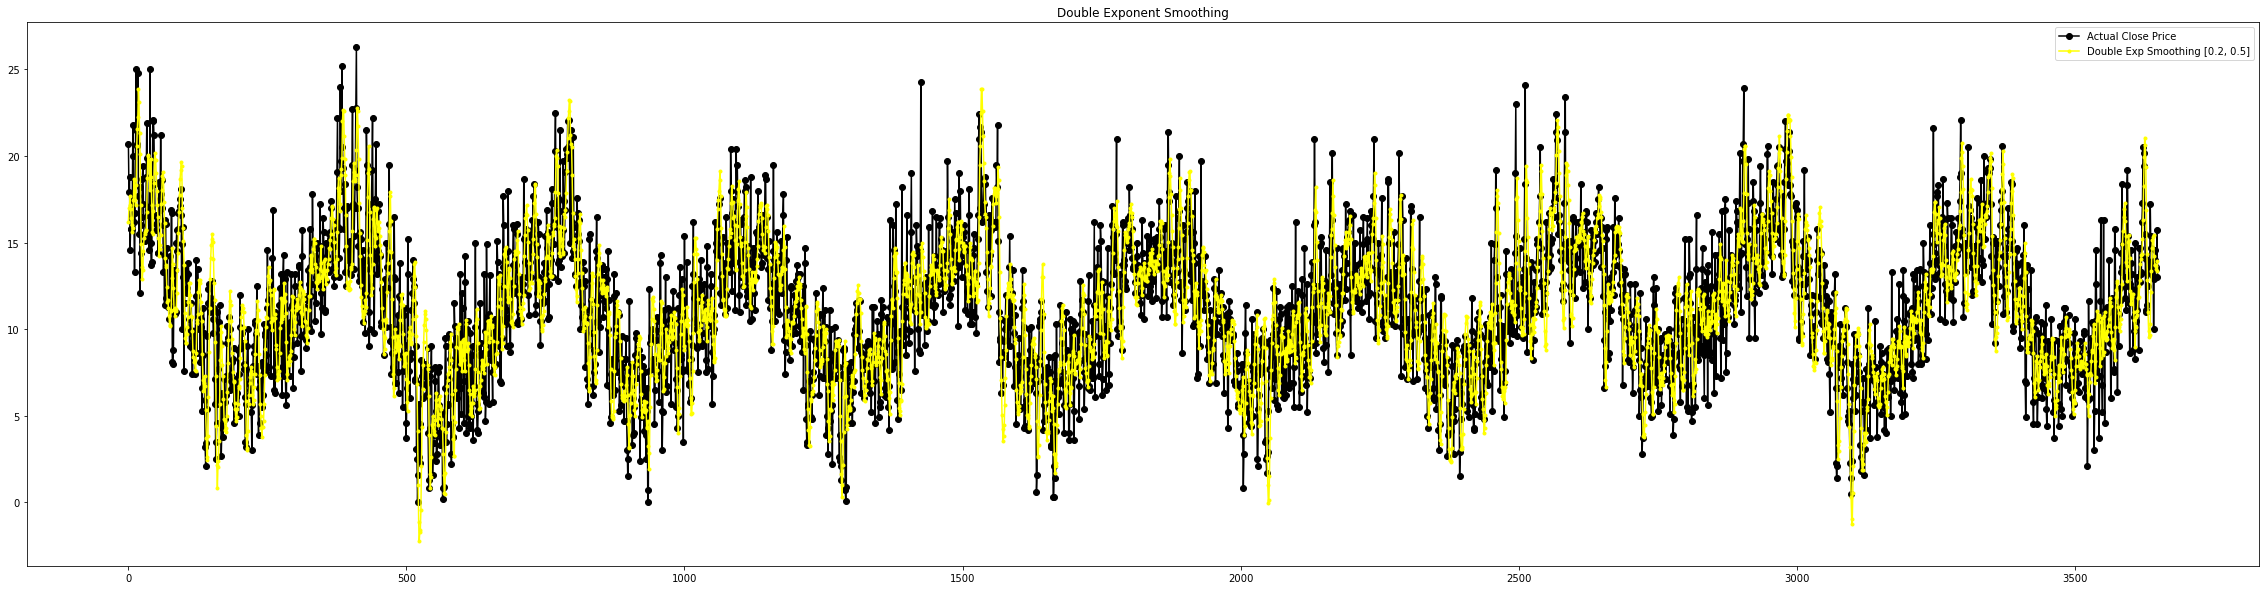

In [52]:
plt.figure(figsize=(40,10))
plt.plot(temp,marker='o',color='black',label='Actual Close Price')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

In [55]:
modelt = ExponentialSmoothing(temp,trend='add',seasonal='add',seasonal_periods=12).fit()

Text(0.5, 1.0, 'Triple Exponent Smoothing')

<Figure size 2880x720 with 0 Axes>

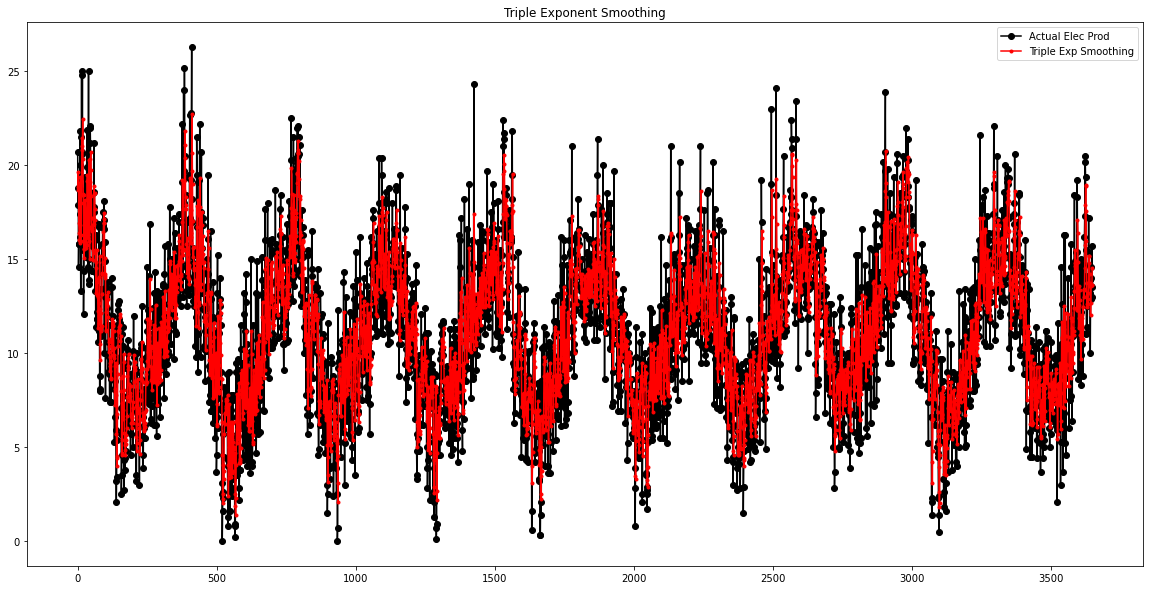

In [56]:
plt.figure(figsize=(40,10))
ax = plt.subplots(figsize = (20,10))
plt.plot(temp, marker='o',color='black',label='Actual Elec Prod')
plt.plot(modelt.fittedvalues,marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()

plt.title('Triple Exponent Smoothing')